# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import csv
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

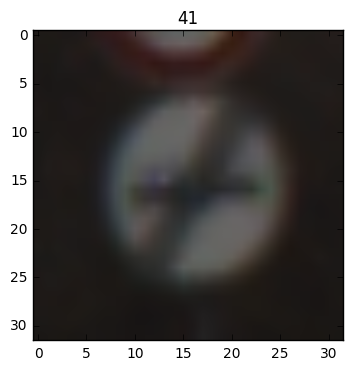

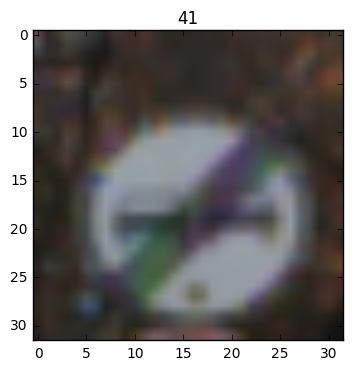

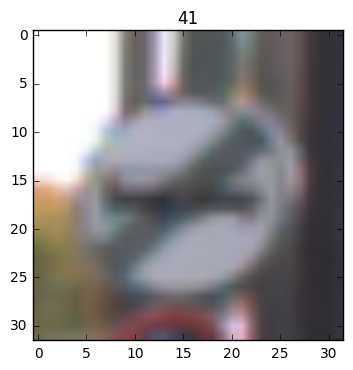

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.imshow(X_train[5])
plt.title(y_train[5])
plt.show()

plt.imshow(X_train[74])
plt.title(y_train[74])
plt.show()

plt.imshow(X_train[105])
plt.title(y_train[105])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Here I'm doing some image transformation, brightness random changes and image rotation to let image be more "live". This code is taken from here: https://github.com/vxy10/ImageAugmentation.
I use 4 types for data augmentation:
1. Rotation - traffic signs can be visible from different point of views, so we need to train our net to be able recognize such cases
2. Translation - our camera not always is targeting the center of screen to the traffic signs. So we need to be able to recognize a traffic sign on any position in image
3. Shearing - to rotate the sign within the image - to see image from different angels
4. Brightness random changing - to be ready for images with different level of brightness

For data pre-processing I used Histogram Equalization technique. For more details I refered to http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html and https://en.wikipedia.org/wiki/Histogram_equalization
This technique is very usesful when images with backgrounds and foregrounds that are both bright or both dark, for example, or when the usable data of the image is represented by close contrast values.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def augment_brightness(image):
    brightness = 0.25 + np.random.uniform()   
    image_new = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_new[:,:,2] = image_new[:,:,2]*brightness 
    return cv2.cvtColor(image_new, cv2.COLOR_HLS2RGB)

#This method is taken from https://github.com/vxy10/ImageAugmentation as great example of image preprocessing
def transform_image(img,ang_range,shear_range,trans_range,brightness=0, showimage=False):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)    
    image = cv2.warpAffine(img,Rot_M,(cols,rows))
    if (showimage):
        img_test = cv2.warpAffine(img,Rot_M,(cols,rows))
        plt.imshow(img_test)
        plt.title("Rotating image")
        plt.show() 
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    if (showimage):
        img_test = cv2.warpAffine(img,Trans_M,(cols,rows))
        plt.imshow(img_test)
        plt.title("Translating image")
        plt.show()     
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    if (showimage):
        img_test = cv2.warpAffine(img,shear_M,(cols,rows))
        plt.imshow(img_test)
        plt.title("Shearing image")
        plt.show()     

    if brightness == 1:
        image = augment_brightness(image)
        if (showimage):
            img_test = augment_brightness(img)
            plt.imshow(img_test)
            plt.title("Random brightness image")
            plt.show() 
            
    if (showimage):
        plt.imshow(image)
        plt.title("Transformed image")
        plt.show() 
            
    return image

#def MinMaxNorm(image, a=-.5, b=.5) :
#    Xmin, Xmax = np.min(image), np.max(image)
#    return (image-Xmin)*(b-a)/(Xmax-Xmin)

def AbsNorm(image, a=-.5, b=0.5, col_min=0, col_max=255) :
    return (image-col_min)*(b-a)/(col_max-col_min)

#def grayscale_norm(image) :
#    # convert to grayscale 
#    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    return MinMaxNorm(img)

#def YUV_norm(image) :
    # convert to YUV color space
#    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    # normalize the Y channel
#    [y,u,v] = [new_image[:,:,i] for i in range(3)]
#    new_image = np.zeros(image.shape)
#    new_image[:,:,0] = MinMaxNorm(y)
#    new_image[:,:,1],new_image[:,:,2] = AbsNorm(u), AbsNorm(v)
#    return new_image

def contrast_norm(image) :
    # convert to  lab colorspace
    lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # apply adative histogram equalization 
    l = lab[:,:,0]
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4,4))
    cl = clahe.apply(l)
    lab[:,:,0] = cl
    # convert back to RGB and scale values 
    img =  cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    new_img = np.zeros(image.shape)
    for i in range(3) :
        new_img[:,:,i] = AbsNorm(img[:,:,i])
    return new_img

def preprocess(image, showimage = False):
    img = contrast_norm(image)
    if (showimage):
        plt.imshow(img)
        plt.title("Preprocessed image")
        plt.show()    
    return img

### Demostration of image preprocessing techniques

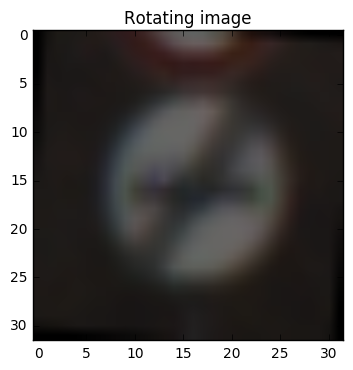

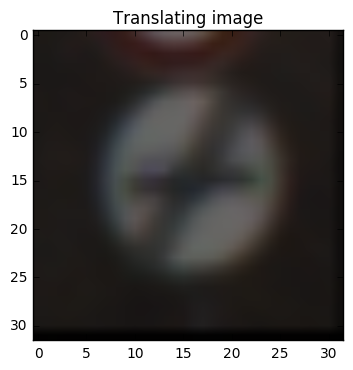

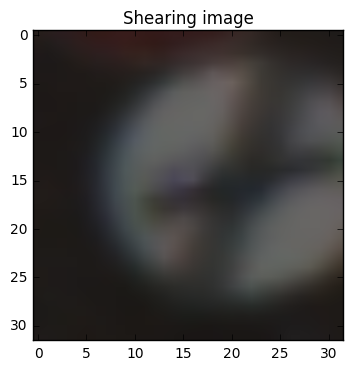

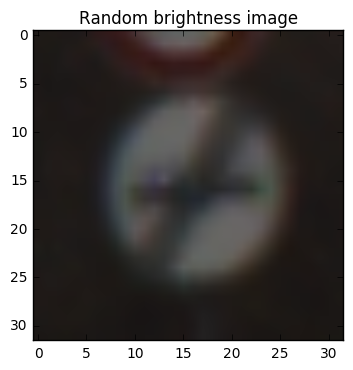

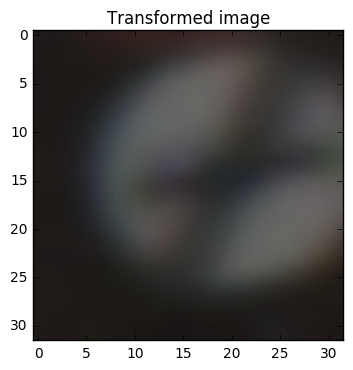

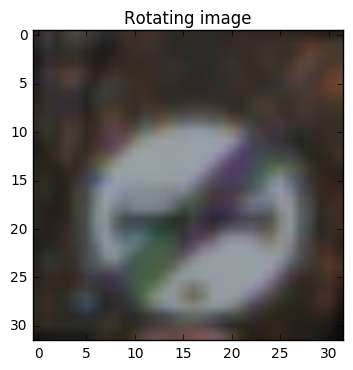

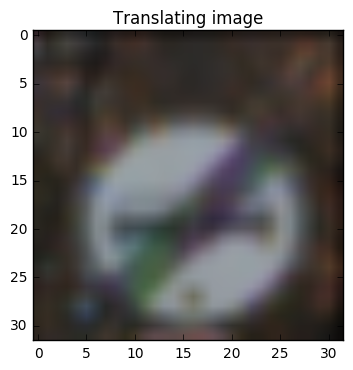

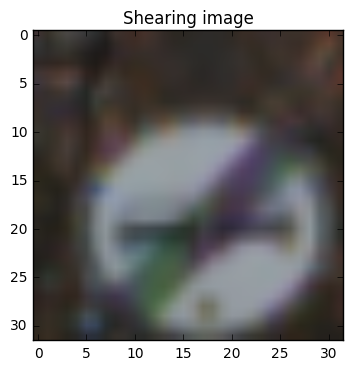

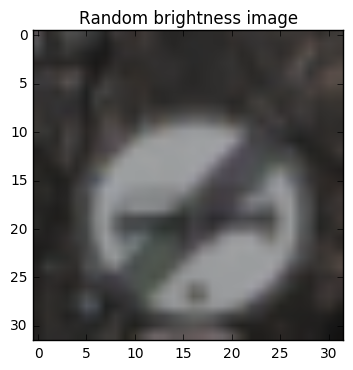

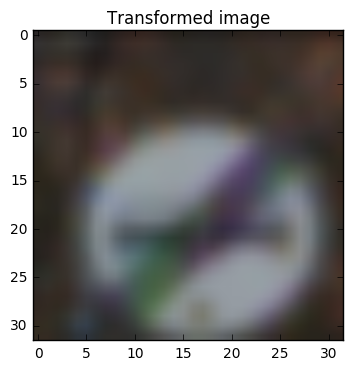

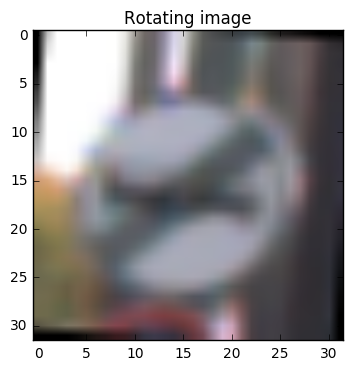

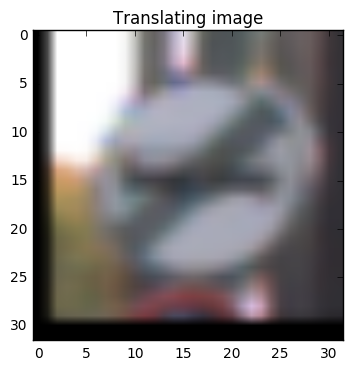

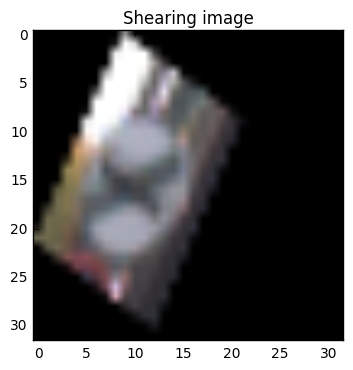

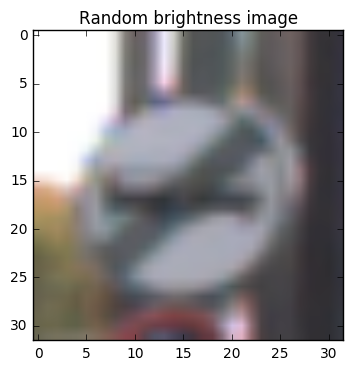

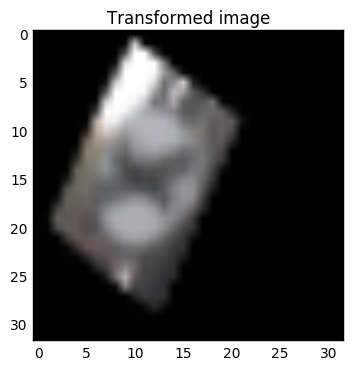

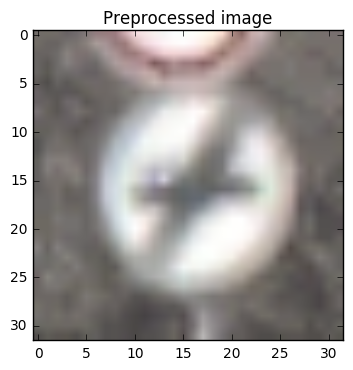

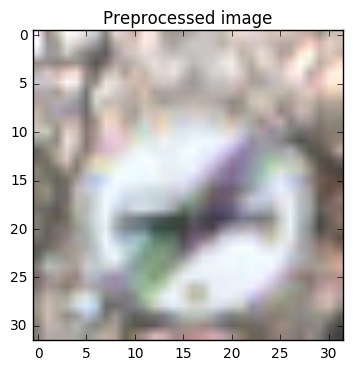

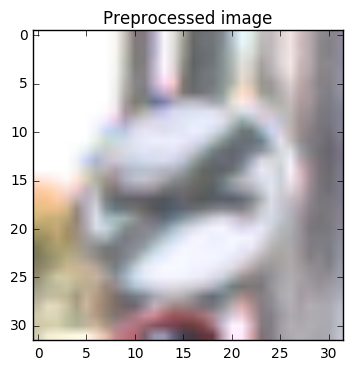

In [5]:
dimage = transform_image(X_train[5],20,10,5,brightness=1, showimage=True)
dimage = transform_image(X_train[74],20,10,5,brightness=1, showimage=True)
dimage = transform_image(X_train[105],20,10,5,brightness=1, showimage=True)
dimage = preprocess(X_train[5], showimage = True)
dimage = preprocess(X_train[74], showimage = True)
dimage = preprocess(X_train[105], showimage = True)

This is helper function to read csv file with class names. It takes class id as input and returns string  - corresponding class name. TODO: refactoring.

In [6]:
def getSignName(id):
    with open("./signnames.csv", 'r') as f:
        reader = csv.reader(f)
        signs_list = list(reader)
        sign_names = list()
        
    for item in signs_list[1:]:
        sign_names.append(item[1])
    
    return sign_names[id]

### Generate additional data

The code below is doing the following: it goes through first 10K images in our data set and applies to them image transformations described above. The new images are appened to the existing data set.

In [7]:
X_train_add = list()
y_train_add = list()

#for i in range(len(X_train)):
for i in range(10000):
    x_new = X_train[i]
    y_new = y_train[i]
    
    img = transform_image(x_new,20,10,5,brightness=1)
    X_train_add.append(img)
    y_train_add.append(y_new)

### Merge Additional data

In [8]:
X_train=np.vstack((X_train,X_train_add))
y_train=np.append(y_train,y_train_add)

print (len(X_train))
print (len(y_train))

44799
44799


### Data mormalization

In [9]:
def normalize(data):
    a = 0.01
    b = 0.99
    color_min = 0.0
    color_max = 255.0
    return a + ((data - color_min) * (b-a))/(color_max - color_min)

In [10]:
new_train_data = []
new_test_data = []
for img in X_train:
    image = preprocess(img)
    #image = normalize(image)
    new_train_data.append(image)

X_train = new_train_data #normalize(X_train)
#X_train = new_train_data
#X_test= normalize(X_test)
for img in X_test:
    image = preprocess(img)
    new_test_data.append(image)
X_test = new_test_data

### Data shuffle

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=100)
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

The model architecture is kind of varioation of LeeNet mentioned in the course. The general structure is 1 Convolutional layer followed by 3 Fully connected layers.  
1. Convolutional layer: input = 32x32x3; output = 16x16x32   
   Activation function: RELU with default parameters
   Max Pooling with padding = SAME and stride: 2. Input : 16x16x32 and the output: 8x8x32
2. Flatten: input : 8x8x32 and the output: 2048
3, Fully connected layer: input = 2048 and the output: 512
4. Dropout rate = 0.6
5. Fully connected layer: input = 512 and the output: 256
6. Dropout rate = 0.6
7. Fully connected layer: input = 256 and the output = 43

Adam optimizer is used with default parameters = it works quite well for our problem

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def signClassifier(data):

    mu = 0
    sigma = 0.1
    
     # Layer 1: Convolutional. Input = 32x32x3. Output = 16*16*32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 2, 2, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    print (conv1)
    
    #Pooling. Input = 16*16*32. Output = 8*8*32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print (conv1)
  
    # Flatten. Input = 8*8*32. Output = 2048.
    fc0   = flatten(conv1)
    print (fc0)
    
    # Layer 2: Fully Connected. Input = 2048. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    

    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.80)
    print (fc1)
    
    # Layer 3: Fully Connected. Input = 512. Output = 256.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, 0.80)
    print (fc2)
    
    # Layer 4: Fully Connected. Input = 256. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.
For training purposes I used batch size = 64. But batch size = 32 leads to faster model convergence. If choose quite high dropout rate with this, for example, = 0.8 it will lead to not so good results on validation sets. Meamwhile, if increase batch size to 128 (or even higher) and decrease dropout rate to 0.6 , so this configuratioin will lead to low or very low convergence speed and not always good results on validation set. High value of batch size also forces GPU/CPU to use more memory. Adam optimizer is quite good choice for this problem since it performs well without deep tuning its parameters. So choosing right values for parameters is always of a traid off depending of on final goals.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened
labels = tf.placeholder("int32", [None])
#convert input lables to one hot encoding format; there are 43 signal lables hence depth = 43
y = tf.one_hot(labels, depth=43, on_value=1., off_value=0., axis=-1)

BATCH_SIZE = 64
rate = 0.001
logits = signClassifier(x)
saver = tf.train.Saver()
print ('done')

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
#softmax = tf.nn.softmax(logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(x_local, y_local):    
    total_acc = 0
    data_len = len(x_local)
    sess = tf.get_default_session()
    
    for offset in range(0, data_len, BATCH_SIZE):
        batch_x, batch_y = x_local[offset:offset+BATCH_SIZE], y_local[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_unflattened: batch_x, labels: batch_y})
        total_acc += (accuracy * len(batch_x))
    return total_acc/data_len

EPOCH_NUM = 100
i = 0
validation_accuracy = 0.0
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Started training")
    #for i in range(EPOCH_NUM):
    while ((i < EPOCH_NUM) and (validation_accuracy < 0.95)):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:
end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x_unflattened: batch_x, labels: batch_y})
            
        validation_accuracy = evaluate(X_test,y_test)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        i += 1

    saver.save(sess, 'signClassifier')

Tensor("Relu:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 8, 8, 32), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(?, 2048), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 512), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 256), dtype=float32)
done
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Started training
EPOCH 1 ...
Validation Accuracy = 0.686
EPOCH 2 ...
Validation Accuracy = 0.798
EPOCH 3 ...
Validation Accuracy = 0.842
EPOCH 4 ...
Validation Accuracy = 0.862
EPOCH 5 ...
Validation Accuracy = 0.872
EPOCH 6 ...
Validation Accuracy = 0.887
EPOCH 7 ...
Validation Accuracy = 0.901
EPOCH 8 ...
Validation Accuracy = 0.901
EPOCH 9 ...
Validation Accuracy = 0.901
EPOCH 10 ...
Validation Accuracy = 0.901
EPOCH 11 ...
Validation Accuracy = 0.905
EPOCH 12 ...
Validation Accuracy = 0.911
EPOCH 13 ...
Validation Accuracy = 0.912
EPOCH 14 ...
Validation Accuracy = 0.914
EPOCH 15 ...
Validation Accuracy = 0.910
EPOCH 16 ...
Va

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I found 5 images on the web with the same class types as I have in csv file. They are: 'Stop', 'Speed limit (30km/h)', 'Speed limit (20km/h)', 'No entry', 'Ahead only'. I read each image, resize it to 32x32 size in RGB and put it 

5
images2classify loaded successfully!


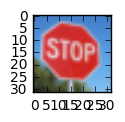

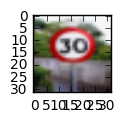

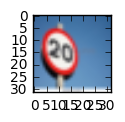

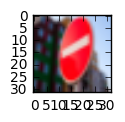

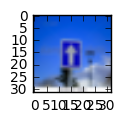

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import ndimage, misc

images = ['test6.jpg','test7.jpg','test8.jpg','test9.jpg', 'test10.jpg']
expected_classes = [14, 1, 0, 17, 35]

images2classify = []

for img in images:
    image = ndimage.imread(img, mode="RGB")
    image = misc.imresize(image, (32, 32))
    images2classify.append(preprocess(image))
    plt.figure(figsize=(1,1))
    plt.imshow(image)

print(len(images2classify))
print('images2classify loaded successfully!')

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess1:
    sess1.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('./signClassifier.meta')
    loader.restore(sess1, tf.train.latest_checkpoint('.'))
    
    classification = sess1.run(tf.argmax(logits, 1), feed_dict={x_unflattened: images2classify})
    print()
    print('Classification:')
    print(classification)
    
    predictions = sess1.run(logits,feed_dict={x_unflattened: images2classify})
    top5 = sess1.run(tf.nn.top_k(tf.nn.softmax(predictions), 5))  
    


Classification:
[14 11  1 17 34]


In [16]:
new_valid_data = []
for img in X_valid:
    image = preprocess(img)
    #image = normalize(image)
    new_valid_data.append(image)

X_valid = new_valid_data #normalize(X_train)

### Analyze Performance

As you can see below, the classifier recognized 4 of 5 signs taken randonmly from the web. In general it detects 30km/h speed limit sign. Also it can be noticed that for 20 km/h is mostly recognized as 30 km/h sign. I think the issue here with digits recognition and detection  - should be improved by more precize data pre-processing. But other 3 it recognized correctly - different shapes and colors.

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print(classification)

actual = ['Stop', 'Speed limit (30km/h)', 'Speed limit (20km/h)', 'No entry', 'Ahead only']
for index, value in enumerate(classification):
    print ("Predicted: " + getSignName(value))
    print ("Actual: " + actual[index])

[14 11  1 17 34]
Predicted: Stop
Actual: Stop
Predicted: Right-of-way at the next intersection
Actual: Speed limit (30km/h)
Predicted: Speed limit (30km/h)
Actual: Speed limit (20km/h)
Predicted: No entry
Actual: No entry
Predicted: Turn left ahead
Actual: Ahead only


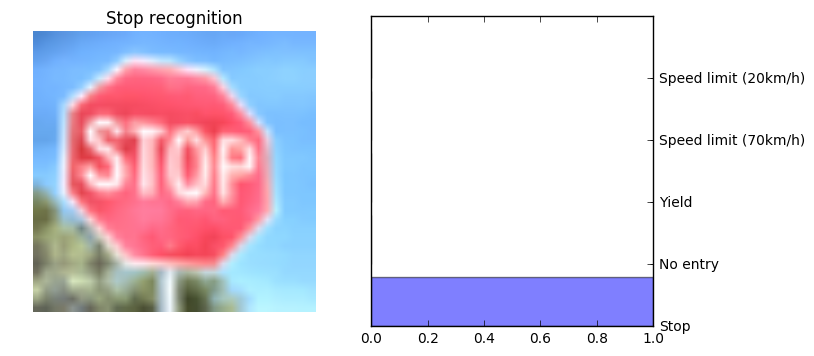

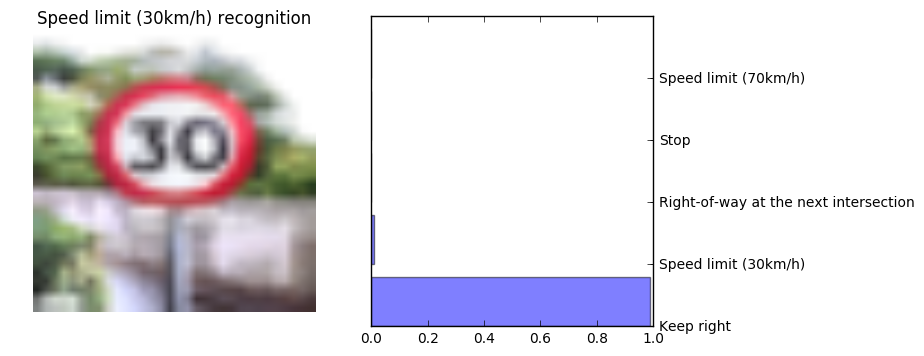

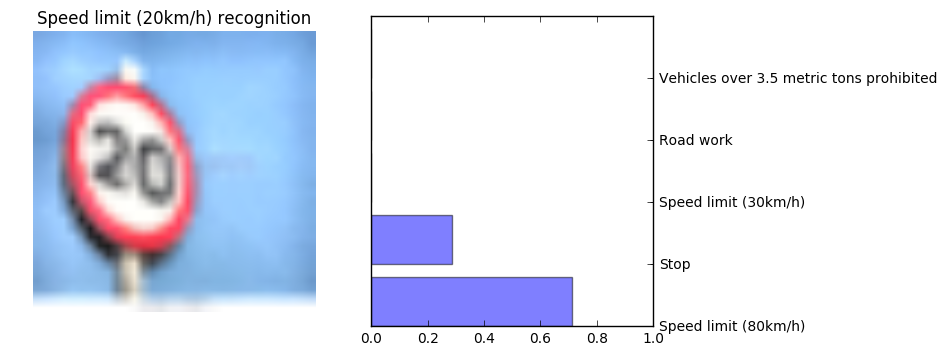

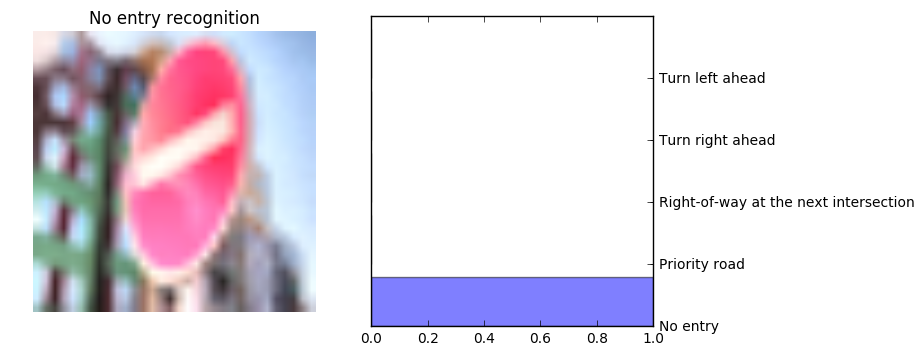

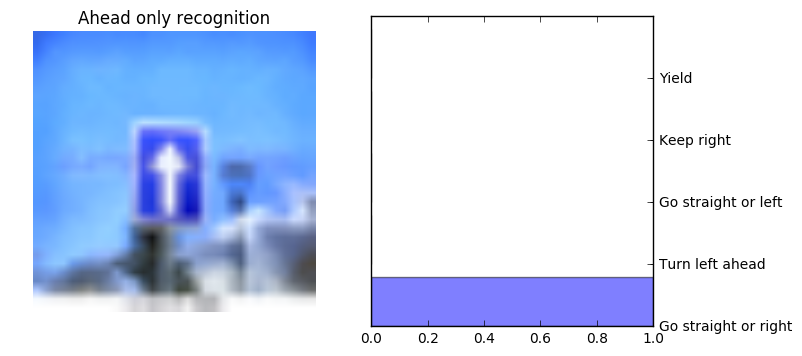

In [18]:
def visualizeProb(idx):
    fig, ax = plt.subplots(1, 2,figsize=(8,4))
    objects = []
    performance = []
    for i in range(5):
        objects.append(getSignName(top5[1][expected_classes.index(idx)][i]))
        performance.append(top5[0][expected_classes.index(idx)][i])
    y_pos = np.arange(len(objects))

    ax[0].imshow(images2classify[expected_classes.index(idx)])
    ax[0].axis('off')
    ax[1].barh(y_pos, performance, alpha=0.5)
    ax[1].set_yticks(y_pos, objects)
    ax[1].set_yticklabels(objects)
    ax[1].yaxis.tick_right()
    ax[1].set_xlim([0,1])    
    
    #plt.imshow(images2classify[expected_classes.index(idx)])
    #plt.barh(y_pos, performance, align='center', alpha=0.5)
    #plt.yticks(y_pos, objects)
    #plt.title(getSignName(idx) + ' recognition')
    #plt.show()
    ax[0].set_title(getSignName(idx) + ' recognition')
    #fig.tight_layout()    
    
for classId in expected_classes:
     visualizeProb(classId)

Testing the model on validation data set. As you can see the results, the percentage of correct predictions is 88%.

In [19]:
with tf.Session() as sess1:
    sess1.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('./signClassifier.meta')
    loader.restore(sess1, tf.train.latest_checkpoint('.'))
    
    classification = sess1.run(tf.argmax(logits, 1), feed_dict={x_unflattened: X_valid})
    
    predictions = sess1.run(logits,feed_dict={x_unflattened: X_valid})
    print ("Correct predictions rate:")
    j = 0
    for i in range(len(y_valid)):
        if (classification[i] == y_valid[i]):
            j += 1
        #print (classification[i], y_valid[i])
    print (j/len(X_valid))

Correct predictions rate:
0.8848072562358277


# Summary

In this small project the basic traffic sign classfies is buit and tested on pictures taken randomly from the web (just google.com). I think it peforms acceptable, it recognized 3 of 5 test images. 2 other images - 20 and 30 speen limit the classifier detects that it is a speed limit but doesn't recognize the digits to classify them correctly. I think it can be done by improving data pre-processing and adding 2 - 3 convolutiona layers (as in original LeNet). Also I noticed that classification is done quite slow and most likely is not usable in real-life - some smarter and faster solutions should be implemented.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
It is done above

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 